Total population of Canada: 33,406,637
Reached target 25,054,977.75 after 1120 (out of 1604) rows
FSA B6L does not exist in PopulationDensity.csv
FSA E3G does not exist in PopulationDensity.csv
FSA G3B does not exist in PopulationDensity.csv
FSA G3C does not exist in PopulationDensity.csv
FSA G3N does not exist in PopulationDensity.csv
FSA G7T does not exist in PopulationDensity.csv
FSA H4Z does not exist in PopulationDensity.csv
FSA H5A does not exist in PopulationDensity.csv
FSA J7W does not exist in PopulationDensity.csv
FSA L9J does not exist in PopulationDensity.csv
FSA N8V does not exist in PopulationDensity.csv
FSA P7L does not exist in PopulationDensity.csv
FSA S4W does not exist in PopulationDensity.csv
FSA S6W does not exist in PopulationDensity.csv
FSA T3S does not exist in PopulationDensity.csv
FSA T8T does not exist in PopulationDensity.csv
FSA V7Y does not exist in PopulationDensity.csv
FSA V9Z does not exist in PopulationDensity.csv


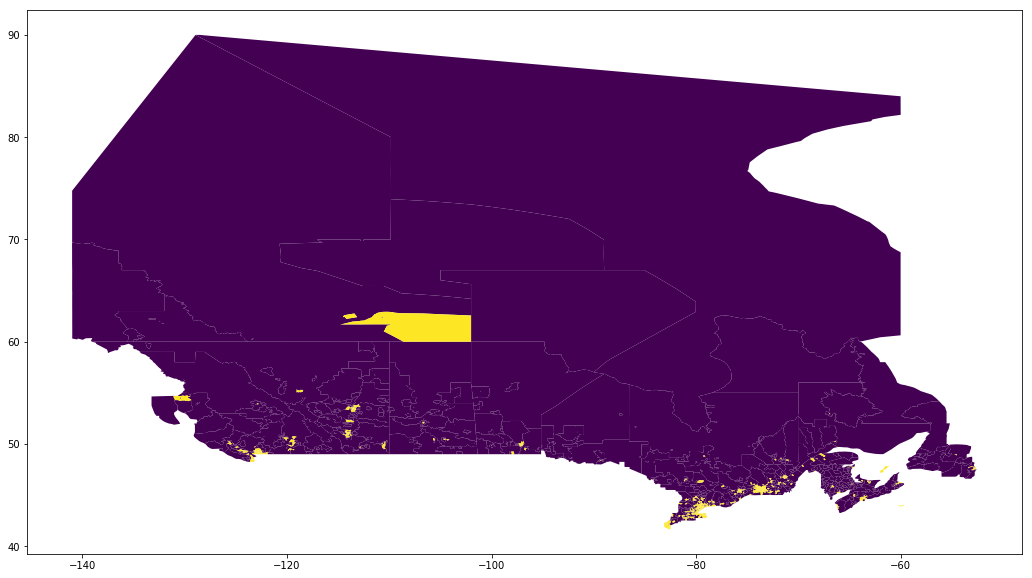

In [3]:
%matplotlib inline
import pandas as pd
import geopandas as gpd

ALPHA = 0.75  #  User-defined fraction of the total population

df = pd.read_csv('PopulationDensity.csv')[['CODE', 'LAT', 'LONG', 'POPULATION']]
# fsa == Forward Sortation Area i.e. the first three characters of a Canadian postal code
df = df.rename({'CODE':'fsa'}, axis='columns')
df_area = pd.read_csv('fsa_area_2006.csv', skiprows=4)[['fsa','sq_km']]
df = df.merge(df_area)
df['density'] = df['POPULATION'] / df['sq_km']
df = df.sort_values(by='density', ascending=False)

total_pop = df['POPULATION'].sum()
print("Total population of Canada: {:,}".format(total_pop))

df['urban'] = False
sum_pop = 0
target = ALPHA * total_pop
num_urban_rows = 0

for i, row in df.iterrows():
    if sum_pop >= target:
        break    
    df.loc[i, 'urban'] = True
    sum_pop += row['POPULATION']
    num_urban_rows += 1

print("Reached target {:,} after {} (out of {}) rows".format(target, num_urban_rows, len(df)))

df_reindexed = df.set_index('fsa')

can = gpd.GeoDataFrame.from_file('/Users/krzysztofmajewski/git/population-density/canada-fsa/gfsa000a11a_e.shp')
can['urban'] = False

for i, row in can.iterrows():
    fsa = row['CFSAUID']
    if fsa in df_reindexed.index:  # a few (18) FSAs are missing in fsa_area_2006.csv
        can.loc[i, 'urban'] = df_reindexed.loc[fsa]['urban']
    else:
        print("FSA {} does not exist in fsa_area_2006.csv".format(fsa))
can.plot(figsize=(20,10), column='urban')